# Least Squares
### Author: Jennefer Maldonado
Due Date: October 12 2020

This Jupyter-Notebook will implement the Householder QR factorization, the implicit calculation of the product $\hat{Q}^{T}b$, and back subsitution. 

Using these functions I will solve the least squares problems arising from polynomial fitting. This will be compared with the traditional Gram-Schmidt procedure to solve the same problem.

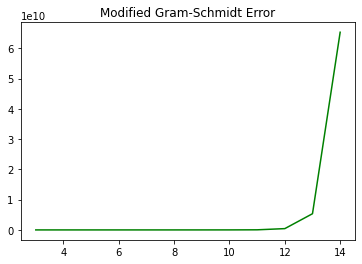

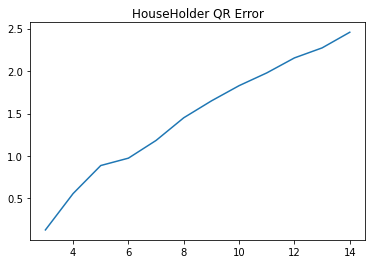

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Computes the sign of x
# Params: x
# Returns: 1 or -1 depending on value of x
def signx(x):
    s = 0
    if x >=0:
        s= 1
    else:
        s = -1
    return s

# Computes the QR factorization using the
# Householder algorithm
# Params: A
# Returns: R
def HouseHolder(A):
    R = np.copy(A)
    (m,n) = np.shape(A)
    #maybe change to zero
    for k in range(0, n):
        x = A[k:m,k]
        x[1] = x[1] + signx(x[1])*np.linalg.norm(x,2)
        v_k = np.divide(x,np.linalg.norm(x,2))
        R[k:2*n,k:n] = R[k:2*n,k:n]-2*np.matmul(np.transpose(v_k),R[k:2*n,k:n])
        #R[k:2*n,k:n] = R[k:2*n,k:n]-2*np.matmul(v_k,(np.matmul(np.transpose(v_k),R[k:2*n,k:n])))
    return R

# Computes Qtb=Qn...Q1b 
def calc_product():
    for k in range(1, n):
        b_k=b_k-2*v_k*(np.transpose(v_k) * b_k)

# Backward Solve
def backf_solve():
    for j in range(1,n):
        b_j = b_j/G[j][j]
        for i in range(j+1, n):
            b_i = b_i-G[i][j]*b_j

# Computes the QR Factorization
# Params: A 
# Returns: Q
def ModifiedGramSchmidt(A):
    Q = np.zeros(A.shape, dtype=A.dtype)
    (m,n) = np.shape(A)
    for j in range(1,n):
        v_j = A[j]
        for i in range(1,n):
            rii = np.linalg.norm(v_j,2)
            Q[i]=v_j/rii
            for j in range(i+1,n):
                rij = np.transpose(Q[i])*v_j
                v_j = v_j - rij*Q[i]
    return Q
                
def polynomial_fit(m,n):
    y = np.zeros(m)
    for i in range(1,m):
        ti = (i-1)/(m-1)
        y[i] = ti**i
    return y

#for plotting
house_error = []
gram_error = []
x_axis = []
for n in range(3,15):
    x_axis.append(n)
    m = 2*n
    A = np.random.rand(m,n)
    A1 = polynomial_fit(m,n)
    R = HouseHolder(A)
    R_2 = np.linalg.norm(R,2)
    Q = ModifiedGramSchmidt(A)
    Q_2 = np.linalg.norm(Q,2)
    q, r = np.linalg.qr(A)
    r_2 = np.linalg.norm(r,2)
    q_2 = np.linalg.norm(q,2)
    gram_error.append(np.abs(R_2-r_2))
    house_error.append(np.abs(Q_2-q_2))

plt.plot(x_axis,gram_error,c = 'g')
plt.title("Modified Gram-Schmidt Error")
plt.show()
plt.plot(x_axis,house_error)
plt.title("HouseHolder QR Error")
plt.show()

### Analysis
Modified Gram-Schmidt requires approximately $2mn^2$ flops and is just slightly less senstive to perturbation in comparison to the Classical Gram-Schmidt. The operation count for HouseHolder is around $2mn^2-\frac{2}{3}n^3$, but if m = n or is close to n it is more efficient than Gram-Schmidt. Thus, both algorithms have reasons to use them over the other. Depending on the size of the matrices it may be beneficial to choose HouseHolder over Modified Gram-Schmidt. Modified Gram-Schmidt also requires less steps to solve this problem as opposed to HouseHolder which requires the implicit computation of Q and the use of backwards substituiton.